In [11]:
import numpy as np
import matplotlib.pyplot as plt
from cirq.contrib.svg import SVGCircuit
import tensorflow as tf
import tensorflow_quantum as tfq
from hep_VQAE import data_preprocessing as dp
import h5py

In [12]:
#f = h5py.File("data/quark-gluon/quark-gluon_train-set_n793900.hdf5","r")
f = h5py.File("data/quark-gluon/quark-gluon_test-set_n10000.hdf5","r")
#f3 = h5py.File("data/quark-gluon/quark-gluon_test-set_n139306.hdf5","r")

In [13]:
f.keys()

<KeysViewHDF5 ['X', 'y']>

In [14]:
x_train = f.get('X')[()]
y_train = f.get('y')[()]

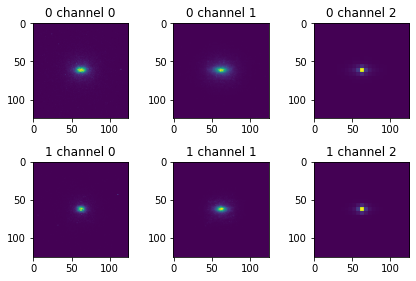

In [15]:
fig, axs = plt.subplots(2,3)

axs[0,0].imshow(np.average(x_train[y_train==0][:,:,:,0],0))
axs[0,0].title.set_text('0 channel 0')

axs[0,1].imshow(np.average(x_train[y_train==0][:,:,:,1],0))
axs[0,1].title.set_text('0 channel 1')

axs[0,2].imshow(np.average(x_train[y_train==0][:,:,:,2],0))
axs[0,2].title.set_text('0 channel 2')

axs[1,0].imshow(np.average(x_train[y_train==1][:,:,:,0],0))
axs[1,0].title.set_text('1 channel 0')

axs[1,1].imshow(np.average(x_train[y_train==1][:,:,:,1],0))
axs[1,1].title.set_text('1 channel 1')

axs[1,2].imshow(np.average(x_train[y_train==1][:,:,:,2],0))
axs[1,2].title.set_text('1 channel 2')

fig.tight_layout()

In [16]:
DOWNSCALE_DIMENSION = 6
LATENT_BITS = 2

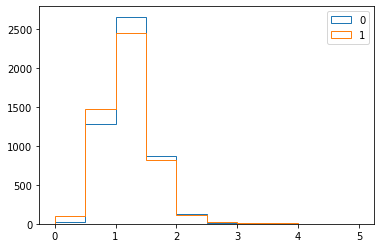

In [29]:
sums = np.sum(x_train[:,:,:,0][y_train==0],axis=(1,2))
sums2 = np.sum(x_train[:,:,:,0][y_train==1],axis=(1,2))
plt.hist(sums,histtype="step",label="0",bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.hist(sums2,histtype="step",label="1",bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.legend()

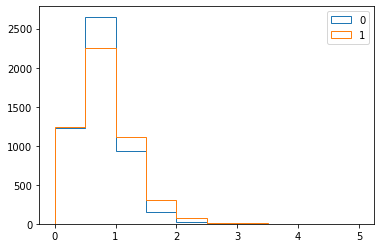

In [30]:
sums = np.sum(x_train[:,:,:,1][y_train==0],axis=(1,2))
sums2 = np.sum(x_train[:,:,:,1][y_train==1],axis=(1,2))
plt.hist(sums,histtype="step",label="0",bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.hist(sums2,histtype="step",label="1",bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.legend()

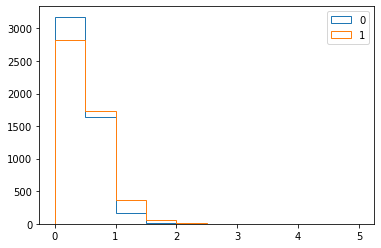

In [31]:
sums = np.sum(x_train[:,:,:,2][y_train==0],axis=(1,2))
sums2 = np.sum(x_train[:,:,:,2][y_train==1],axis=(1,2))
plt.hist(sums,histtype="step",label="0",bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.hist(sums2,histtype="step",label="1",bins=[0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5])
plt.legend()

In [7]:
x_train = dp.TruncatedPCA_reduce(x_train[:,:,:,0], 100)
x_train = dp.lle_reduce(x_train, DOWNSCALE_DIMENSION)

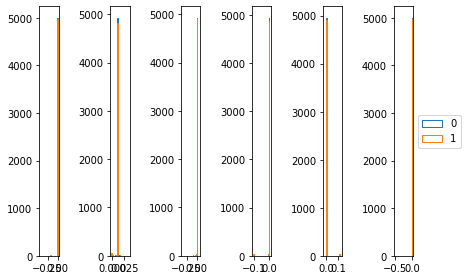

In [9]:
fig, axs = plt.subplots(1,6)
for i in range(0,6):
    bins = np.histogram(np.hstack((x_train[y_train==0][:,i].reshape((x_train[y_train==0][:,i].shape[0],)), x_train[y_train==1][:,i].reshape((x_train[y_train==1][:,i].shape[0],)))), bins=30)[1]
    axs[i].hist(x_train[y_train==0][:,i], label="0", histtype='step', bins=bins)
    axs[i].hist(x_train[y_train==1][:,i], label="1", histtype='step', bins=bins)
fig.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
fig, axs = plt.subplots(2,DOWNSCALE_DIMENSION//2)
for i in range(0,DOWNSCALE_DIMENSION):
    bins = np.histogram(np.hstack((x_train[y_train==0][:,i].reshape((x_train[y_train==0][:,i].shape[0],)), x_train[y_train==1][:,i].reshape((x_train[y_train==1][:,i].shape[0],)))), bins=30)[1]
    axs[int(i//(DOWNSCALE_DIMENSION/2)),int(i%(DOWNSCALE_DIMENSION/2))].hist(x_train[y_train==0][:,i], label="0", histtype='step', bins=bins)
    axs[int(i//(DOWNSCALE_DIMENSION/2)),int(i%(DOWNSCALE_DIMENSION/2))].hist(x_train[y_train==1][:,i], label="1", histtype='step', bins=bins)
fig.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
fig, axs = plt.subplots(1,2)

bins = np.histogram(np.hstack((x_train[y_train==0][:,0].reshape((x_train[y_train==0][:,0].shape[0],)), x_train[y_train==1][:,0].reshape((x_train[y_train==1][:,0].shape[0],)))), bins=30)[1]
axs[0].hist(x_train[y_train==0][:,0], label="0", histtype='step', bins=bins)
axs[0].hist(x_train[y_train==1][:,0], label="1", histtype='step', bins=bins)


bins = np.histogram(np.hstack((x_train[y_train==0][:,1].reshape((x_train[y_train==0][:,1].shape[0],)), x_train[y_train==1][:,1].reshape((x_train[y_train==1][:,1].shape[0],)))), bins=30)[1]
axs[1].hist(x_train[y_train==0][:,1], label="0", histtype='step', bins=bins)
axs[1].hist(x_train[y_train==1][:,1], label="1", histtype='step', bins=bins)


fig.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
from sklearn.model_selection import train_test_split



x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                    test_size=0.2, shuffle=True)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,
                                                    test_size=0.25, shuffle=True)

In [ ]:
x_train_electrons = x_train[y_train==1]
x_train = x_train[y_train==0]

x_val_electrons = x_val[y_val==1]
x_val = x_val[y_val==0]

x_test_electrons = x_test[y_test==1]
x_test = x_test[y_test==0]

In [ ]:
x_train_circuit = [dp.input_states_SQAE(x,DOWNSCALE_DIMENSION,LATENT_BITS) for x in x_train]
x_val_circuit = [dp.input_states_SQAE(x,DOWNSCALE_DIMENSION,LATENT_BITS) for x in x_val]
x_test_circuit = [dp.input_states_SQAE(x,DOWNSCALE_DIMENSION,LATENT_BITS) for x in x_test]

x_train_circuit_electrons = [dp.input_states_SQAE(x,DOWNSCALE_DIMENSION,LATENT_BITS) for x in x_train_electrons]
x_val_circuit_electrons = [dp.input_states_SQAE(x,DOWNSCALE_DIMENSION,LATENT_BITS) for x in x_val_electrons]
x_test_circuit_electrons = [dp.input_states_SQAE(x,DOWNSCALE_DIMENSION,LATENT_BITS) for x in x_test_electrons]

In [ ]:
x_train_tf = tfq.convert_to_tensor(x_train_circuit)
x_val_tf = tfq.convert_to_tensor(x_val_circuit)
x_test_tf = tfq.convert_to_tensor(x_test_circuit)

x_train_tf_electrons = tfq.convert_to_tensor(x_train_circuit_electrons)
x_val_tf_electrons = tfq.convert_to_tensor(x_val_circuit_electrons)
x_test_tf_electrons = tfq.convert_to_tensor(x_test_circuit_electrons)

In [ ]:
from hep_VQAE import QAE as qae

model = qae.SQAE_model(DOWNSCALE_DIMENSION,LATENT_BITS,7)

In [ ]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(lr=0.01))

In [ ]:
y_train_ones = np.ones(shape=len(x_train_tf))
y_val_ones = np.ones(shape=len(x_val_tf))
y_test_ones = np.ones(shape=len(x_test_tf))

y_train_ones_electrons = np.ones(shape=len(x_train_tf_electrons))
y_val_ones_electrons = np.ones(shape=len(x_val_tf_electrons))
y_test_ones_electrons = np.ones(shape=len(x_test_tf_electrons))

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(x_train_tf, y_train_ones, epochs=10, batch_size=64, validation_data=(x_val_tf, y_val_ones), callbacks=[es])

In [ ]:
plt.plot(history.history['loss'], label="training")
plt.plot(history.history['val_loss'], label="validation")
plt.yscale('log')
plt.xlabel("epoch")
plt.ylabel("1-Fidelity")
plt.legend()

In [ ]:
pred_photon = model.predict(x_test_tf)
print(np.median(pred_photon))
pred_electron = model.predict(x_test_tf_electrons)
print(np.median(pred_electron))
bins = np.histogram(np.hstack((pred_photon.reshape((pred_photon.shape[0],)), pred_electron.reshape((pred_electron.shape[0],)))), bins=15)[1]
plt.hist(pred_photon, histtype='step', label="photons",bins=bins)
plt.hist(pred_electron, histtype='step', label="electron",bins=bins)
plt.xlabel("Reconstruction Fidelity")
plt.legend()

In [ ]:
def acc_for_threshold(T):
    # sixes that are predicted six
    num_six_right = np.sum(pred_photon > T)
    # threes that are predicted three
    num_three_right = np.sum(pred_electron < T)
    acc = (num_six_right + num_three_right)/(len(pred_photon) + len(pred_electron))
    return acc

Ts = np.linspace(0,1,100)
accs = []
for i in Ts:
    accs.append(acc_for_threshold(i))
plt.plot(Ts, accs)  